# Algoritma Filtering

### 1. Import Package Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import time

### 2. Load Image

Image shape: (256, 256)


<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\lukas\AppData\Local\Temp\ipykernel_23480\3717711437.py:1: SyntaxWarning: invalid escape sequence '\C'
  path = "Data Chest X-Ray RSUA (Annotated)\Covid\images\Covid_1.bmp"   # ganti sesuai file BMP kamu


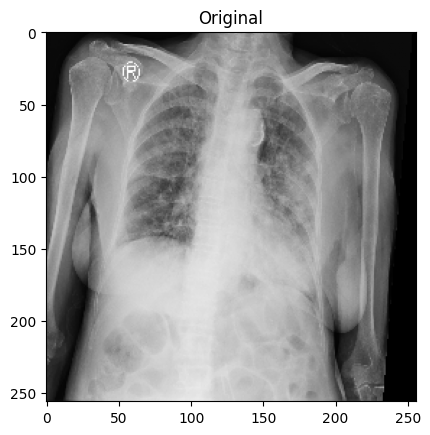

In [3]:
path = "Data Chest X-Ray RSUA (Annotated)\Covid\images\Covid_1.bmp"   # ganti sesuai file BMP kamu
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

print("Image shape:", img.shape)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.show()

### 3. Feature Extraction

In [4]:
def descriptive_stats(image):
    flat = image.flatten()
    stats = {
        "count": len(flat),
        "mean": np.mean(flat),
        "std": np.std(flat),
        "min": np.min(flat),
        "Q1": np.percentile(flat, 25),
        "median": np.median(flat),
        "Q3": np.percentile(flat, 75),
        "max": np.max(flat),
        "skewness": skew(flat)
    }
    return stats

stats = descriptive_stats(img)
stats

{'count': 65536,
 'mean': np.float64(132.67027282714844),
 'std': np.float64(64.18332711900128),
 'min': np.uint8(0),
 'Q1': np.float64(98.0),
 'median': np.float64(144.0),
 'Q3': np.float64(185.0),
 'max': np.uint8(254),
 'skewness': np.float64(-0.6780766315362888)}

### 4. Histogram Equalization

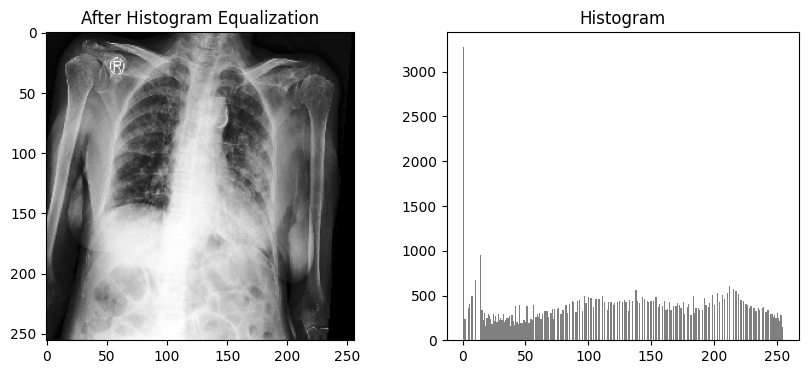

In [5]:
img_he = cv2.equalizeHist(img)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img_he, cmap='gray')
plt.title("After Histogram Equalization")

plt.subplot(1,2,2)
plt.hist(img_he.flatten(), bins=256, color='gray')
plt.title("Histogram")
plt.show()

### 5. Noise Variance & SNR

In [6]:
def noise_variance(image):
    return np.var(image.astype(np.float32))

def SNR(image):
    signal = np.mean(image)
    noise = np.std(image)
    return signal / noise

print("Noise variance:", noise_variance(img))
print("SNR:", SNR(img))


Noise variance: 4119.4995
SNR: 2.0670519710074644


### 6. Filter Functions

##### Moving Average

In [7]:
def moving_average(img, k=5):
    return cv2.blur(img, (k,k))

##### Median Filter

In [17]:
def median_filter(img, k=3):
    return cv2.medianBlur(img, k)

##### Gaussian Filter

In [9]:
def gaussian_filter(img, k=5, sigma=1):
    return cv2.GaussianBlur(img, (k,k), sigma)

##### Bilateral Filter

In [10]:
def bilateral_filter(img):
    return cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

### 7. Apply All Filters

In [11]:
f_ma  = moving_average(img)
f_med = median_filter(img)
f_ga  = gaussian_filter(img)
f_bi  = bilateral_filter(img)

### 8. MSE & PSNR

In [12]:
def MSE(orig, den):
    return np.mean((orig - den)**2)

def PSNR(orig, den):
    mse = MSE(orig, den)
    if mse == 0:
        return 100
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

##### Display MSE & RMSE:

In [13]:
methods = {
    "Moving Average": f_ma,
    "Median": f_med,
    "Gaussian": f_ga,
    "Bilateral": f_bi
}

for name, f in methods.items():
    print(f"\n--- {name} ---")
    print("MSE :", MSE(img, f))
    print("PSNR:", PSNR(img, f))



--- Moving Average ---
MSE : 25.743911743164062
PSNR: 34.02405822985025

--- Median ---
MSE : 17.108322143554688
PSNR: 35.79872941597201

--- Gaussian ---
MSE : 16.367477416992188
PSNR: 35.99098610490766

--- Bilateral ---
MSE : 30.806411743164062
PSNR: 33.244392451831345


### 9. Hasil

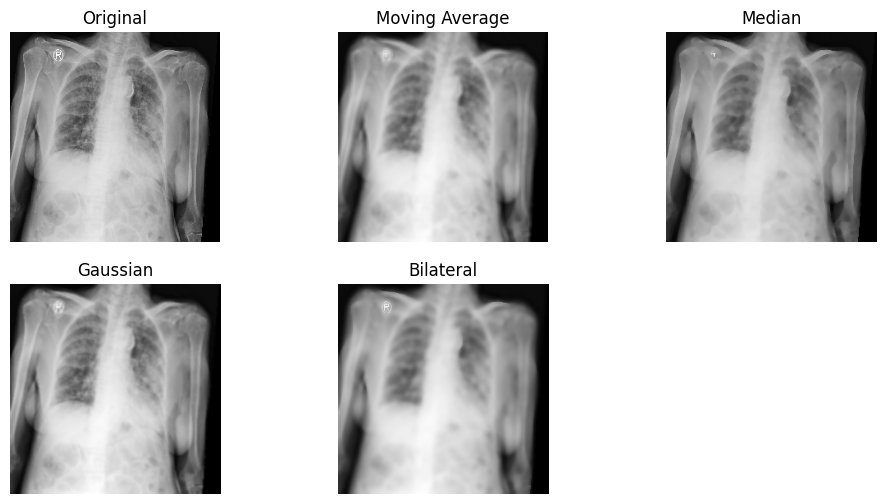

In [18]:
titles = ["Original", "Moving Average", "Median", "Gaussian", "Bilateral"]
images = [img, f_ma, f_med, f_ga, f_bi]

plt.figure(figsize=(12,6))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")
plt.show()

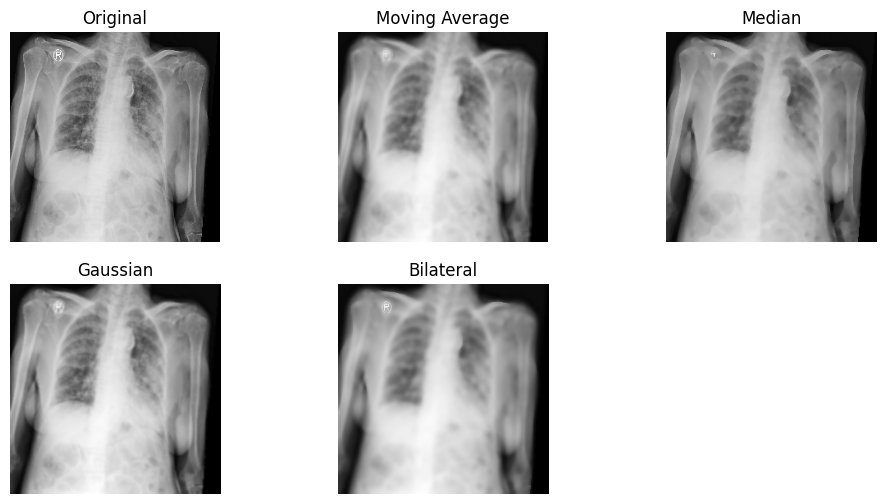

In [16]:
titles = ["Original", "Moving Average", "Median", "Gaussian", "Bilateral"]
images = [img, f_ma, f_med, f_ga, f_bi]

plt.figure(figsize=(12,6))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")
plt.show()
